In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
NNt1 = pd.read_excel('./target_decoy/HEK/NFRP_mz5_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,LSVEADINGLR/3,0.374,0.0582,[2],0,0.330,72,0.0909,...,-1,0,0,(),Normal,Unk,Unk,1,Target,179616066
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,RYPAHLAR/3,0.157,0.0280,[2],0,0.334,26,0.0670,...,-1,0,0,(),Normal,Unk,Unk,1,Target,238770298
2,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.479,0.1780,[2],0,-0.002,81,0.0840,...,-1,0,0,(),Normal,Unk,Unk,1,Target,236712735
3,b1906_293T_proteinID_01A_QE3_122212.01909.01909.3,1,HGGYKPSDEHK/3,0.579,0.2940,[2],0,-0.003,20,0.1100,...,-1,0,0,(),Normal,Unk,Unk,1,Target,108607791
4,b1906_293T_proteinID_01A_QE3_122212.01910.01910.4,1,HGGYKPSDEHK/4,0.611,0.5030,[2],0,-0.002,4,0.1970,...,-1,0,0,(),Normal,Unk,Unk,1,Target,108608513


In [4]:
NNd1 = pd.read_excel('./target_decoy/HEK/NFRP_mz5_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,AEIHAC[160]K/2,0.143,0.010,[2],0,0.008,17,0.053,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,341981205
1,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,PRHNGFEGPALVK/4,0.186,0.094,[2],0,-0.002,4,0.094,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,582154086
2,b1906_293T_proteinID_01A_QE3_122212.01911.01911.3,1,AEDSNEQC[160]QVPHEDSSTEPEVK/3,0.080,0.017,[2],0,0.008,5,0.048,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,576873910
3,b1906_293T_proteinID_01A_QE3_122212.01913.01913.2,1,PDALIGC[160]ENK/2,0.275,0.049,[2],0,0.494,50,0.066,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,495608199
4,b1906_293T_proteinID_01A_QE3_122212.01914.01914.3,1,ILNQPEEVLPK/3,0.349,0.000,[2],0,0.329,53,0.100,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,509251924


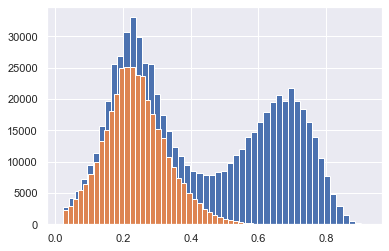

In [5]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.018000000000000006
0.01526


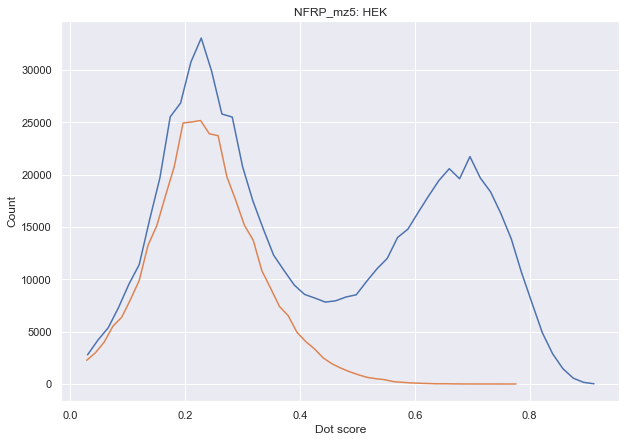

In [9]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('NFRP_mz5: HEK')
plt.plot(nnt1[1][:-1] + 0.009, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.0075, nnd1[0])
plt.show()

In [7]:
print(len(NNt1))
print(len(NNd1))

682177
351803


In [8]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.5000000000000003
nnt:  276928
nnd:  2735
FDR:  0.009876213311763346
"""

score:  0.001
nnt:  682177
nnd:  351803
FDR:  0.515706334279813


score:  0.002
nnt:  682177
nnd:  351803
FDR:  0.515706334279813


score:  0.003
nnt:  682177
nnd:  351803
FDR:  0.515706334279813


score:  0.004
nnt:  682177
nnd:  351803
FDR:  0.515706334279813


score:  0.005
nnt:  682177
nnd:  351803
FDR:  0.515706334279813


score:  0.006
nnt:  682177
nnd:  351803
FDR:  0.515706334279813


score:  0.007
nnt:  682177
nnd:  351803
FDR:  0.515706334279813


score:  0.008
nnt:  682177
nnd:  351803
FDR:  0.515706334279813


score:  0.009000000000000001
nnt:  682177
nnd:  351803
FDR:  0.515706334279813


score:  0.010000000000000002
nnt:  682177
nnd:  351803
FDR:  0.515706334279813


score:  0.011000000000000003
nnt:  682177
nnd:  351803
FDR:  0.515706334279813


score:  0.012000000000000004
nnt:  682177
nnd:  351803
FDR:  0.515706334279813


score:  0.013000000000000005
nnt:  682177
nnd:  351803
FDR:  0.515706334279813


score:  0.014000000000000005
nnt:  682177
nnd:  351803
FDR:  0.5157

nnt:  657012
nnd:  327058
FDR:  0.49779608287215454


score:  0.10500000000000008
nnt:  656468
nnd:  326483
FDR:  0.497332695576936


score:  0.10600000000000008
nnt:  655915
nnd:  325967
FDR:  0.49696530800484817


score:  0.10700000000000008
nnt:  655322
nnd:  325429
FDR:  0.4965940407921602


score:  0.10800000000000008
nnt:  654714
nnd:  324858
FDR:  0.49618306619378844


score:  0.10900000000000008
nnt:  654157
nnd:  324301
FDR:  0.4957540773850926


score:  0.11000000000000008
nnt:  653590
nnd:  323716
FDR:  0.49528909561039797


score:  0.11100000000000008
nnt:  652990
nnd:  323150
FDR:  0.4948774100675355


score:  0.11200000000000009
nnt:  652435
nnd:  322572
FDR:  0.49441247020776014


score:  0.11300000000000009
nnt:  651848
nnd:  321983
FDR:  0.4939541120015709


score:  0.11400000000000009
nnt:  651224
nnd:  321369
FDR:  0.49348457673550117


score:  0.11500000000000009
nnt:  650617
nnd:  320763
FDR:  0.4930135548256501


score:  0.11600000000000009
nnt:  649970
nnd:  3201

nnt:  543785
nnd:  217287
FDR:  0.3995825556056162


score:  0.20700000000000016
nnt:  542127
nnd:  215685
FDR:  0.3978495813711547


score:  0.20800000000000016
nnt:  540459
nnd:  214007
FDR:  0.39597268247915196


score:  0.20900000000000016
nnt:  538697
nnd:  212320
FDR:  0.394136221289519


score:  0.21000000000000016
nnt:  537007
nnd:  210656
FDR:  0.39227794051101755


score:  0.21100000000000016
nnt:  535298
nnd:  208975
FDR:  0.39039002574267045


score:  0.21200000000000016
nnt:  533565
nnd:  207293
FDR:  0.38850561787223675


score:  0.21300000000000016
nnt:  531825
nnd:  205633
FDR:  0.3866553847600244


score:  0.21400000000000016
nnt:  530115
nnd:  203960
FDR:  0.38474670590343607


score:  0.21500000000000016
nnt:  528353
nnd:  202289
FDR:  0.38286713617600354


score:  0.21600000000000016
nnt:  526674
nnd:  200551
FDR:  0.38078773586696896


score:  0.21700000000000016
nnt:  524960
nnd:  198875
FDR:  0.3788383876866809


score:  0.21800000000000017
nnt:  523118
nnd:  197

nnt:  389186
nnd:  72100
FDR:  0.18525846253462355


score:  0.3090000000000002
nnt:  388118
nnd:  71130
FDR:  0.1832690058178183


score:  0.3100000000000002
nnt:  387122
nnd:  70212
FDR:  0.18136918077505282


score:  0.3110000000000002
nnt:  386020
nnd:  69232
FDR:  0.17934822029946634


score:  0.3120000000000002
nnt:  385026
nnd:  68332
FDR:  0.17747372904686956


score:  0.3130000000000002
nnt:  383974
nnd:  67435
FDR:  0.1756238703662227


score:  0.3140000000000002
nnt:  382937
nnd:  66547
FDR:  0.17378054353588188


score:  0.3150000000000002
nnt:  381955
nnd:  65665
FDR:  0.1719181578981817


score:  0.3160000000000002
nnt:  381008
nnd:  64753
FDR:  0.16995181203544282


score:  0.3170000000000002
nnt:  380028
nnd:  63881
FDR:  0.1680955087519867


score:  0.3180000000000002
nnt:  379083
nnd:  63029
FDR:  0.16626701804090396


score:  0.31900000000000023
nnt:  378126
nnd:  62157
FDR:  0.16438171403183066


score:  0.32000000000000023
nnt:  377179
nnd:  61331
FDR:  0.162604492

nnt:  317338
nnd:  15093
FDR:  0.04756127535939598


score:  0.4120000000000003
nnt:  316876
nnd:  14834
FDR:  0.04681326449462881


score:  0.4130000000000003
nnt:  316404
nnd:  14580
FDR:  0.04608032768233018


score:  0.4140000000000003
nnt:  315920
nnd:  14326
FDR:  0.04534692327171436


score:  0.4150000000000003
nnt:  315477
nnd:  14070
FDR:  0.044599130839966146


score:  0.4160000000000003
nnt:  315043
nnd:  13836
FDR:  0.043917814393590715


score:  0.4170000000000003
nnt:  314626
nnd:  13592
FDR:  0.04320049836949267


score:  0.4180000000000003
nnt:  314178
nnd:  13357
FDR:  0.04251411620164365


score:  0.4190000000000003
nnt:  313683
nnd:  13133
FDR:  0.04186710787642301


score:  0.4200000000000003
nnt:  313225
nnd:  12914
FDR:  0.041229148375768215


score:  0.4210000000000003
nnt:  312762
nnd:  12712
FDR:  0.040644323798926976


score:  0.4220000000000003
nnt:  312324
nnd:  12483
FDR:  0.03996811003957429


score:  0.4230000000000003
nnt:  311870
nnd:  12246
FDR:  0.039

'\n결과\nscore:  0.5000000000000003\nnnt:  276928\nnnd:  2745\nFDR:  0.00991232378091056\n'